# Name That Chart Data Analysis

This notebook is supplemental material of the submitted article "*What do you call this kind of chart?* Building an Information Visualization Taxonomy Using Collaborative Crowdsourcing" at CHI 2018

In [127]:
import numpy as np
import pandas as pd # package for working with data frames in python
import seaborn as sns # package for visualization (more on seaborn later)

# plots
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set(color_codes=True)

# Stats to be included in the LaTeX article
stats = {}

## Log Events Analysis

In [128]:
# Retrieving experiment data from the crowdsourcing web app
# Data URL https://namethatchart.herokuapp.com/db2csv
df = pd.read_csv('data/data-22-08-2017.csv', sep=',') #  index_col=[0]

# In case we want to retrieve latest / live data
# url = "https://namethatchart.herokuapp.com/datcsv.csv"
# c=pd.read_csv(url)


# TODO:
# - Allow to filter by time period 
# - Remove certain users/IPs we are not interested in

In [129]:
df

,task,task_id,iduser,timestamp,date,event,idtype,label,idimg,imagepath
0,textual,textual_3,22,1501074459,2017-07-26 15:07:39.289,submitted,7,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,textual,textual_7,22,1501075088,2017-07-26 15:18:08.598,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,textual,textual_8,22,1501075105,2017-07-26 15:18:25.580,submitted,9,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,textual,textual_9,22,1501075113,2017-07-26 15:18:33.395,submitted,8,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,textual,textual_10,22,1501075119,2017-07-26 15:18:39.158,submitted,8,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,textual,textual_11,22,1501075131,2017-07-26 15:18:51.656,submitted,9,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,textual,textual_12,22,1501075143,2017-07-26 15:19:03.262,submitted,7,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,textual,textual_13,22,1501075155,2017-07-26 15:19:15.433,submitted,7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,textual,textual_14,22,1501075162,2017-07-26 15:19:22.597,submitted,10,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,textual,textual_15,22,1501075170,2017-07-26 15:19:30.230,submitted,8,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


In [130]:
stats["nbTotalLogsEntries"] = len(df)
print("Total number of log entries that we recorded: %s" % stats["nbTotalLogsEntries"])

Total number of log entries that we recorded: 6640


In [131]:
# Log entries attributes
df.columns

Index(['task', 'task_id', 'iduser', 'timestamp', 'date', 'event', 'idtype',
       'label', 'idimg', 'imagepath'],
      dtype='object')

In [132]:
# Distribution by log entry user events
df['event'].value_counts()[:10]

visible        3624
swipe          1229
page loaded    1099
skip            293
chosen          202
submitted       193
Name: event, dtype: int64

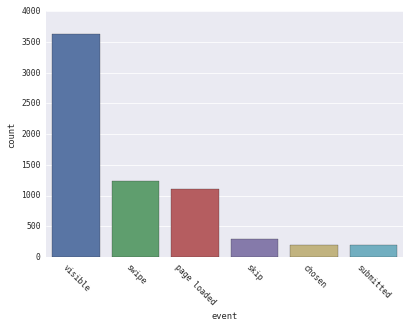

In [133]:
# TODO: chart that shows the events distribution
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='event', data=df, order=df.event.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/event-distribution.png")

In [134]:
df['task'].value_counts()[:10]

selection    3151
swipe        3059
reverse       237
textual       193
Name: task, dtype: int64

In [135]:
df['label'].value_counts()[:10]

bubble chart    1087
map              860
flow chart       797
bar chart        766
pie chart        658
tree diagram     644
table            641
scatter plot     511
area chart       303
line chart       168
Name: label, dtype: int64

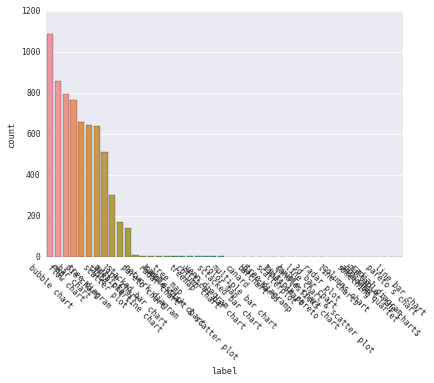

In [136]:
# Distribution by image label
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='label', data=df, order=df.label.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
# fig.set_size_inches(11.7, 8.27)
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/categories-distribution.png")

In [146]:
# df.label.value_counts()[:10]
df_label_top10 = df.groupby("label").filter(lambda x: len(x) > 10)
df_label_top10

,task,task_id,iduser,timestamp,date,event,idtype,label,idimg,imagepath
0,textual,textual_3,22,1501074459,2017-07-26 15:07:39.289,submitted,7,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,textual,textual_7,22,1501075088,2017-07-26 15:18:08.598,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
3,textual,textual_9,22,1501075113,2017-07-26 15:18:33.395,submitted,8,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,textual,textual_10,22,1501075119,2017-07-26 15:18:39.158,submitted,8,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
6,textual,textual_12,22,1501075143,2017-07-26 15:19:03.262,submitted,7,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,textual,textual_13,22,1501075155,2017-07-26 15:19:15.433,submitted,7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
9,textual,textual_15,22,1501075170,2017-07-26 15:19:30.230,submitted,8,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...
10,textual,textual_16,22,1501075176,2017-07-26 15:19:36.075,submitted,7,bubble chart,49,https://s3.eu-central-1.amazonaws.com/namethat...
12,textual,textual_20,22,1501075220,2017-07-26 15:20:20.193,submitted,12,flow chart,120,https://s3.eu-central-1.amazonaws.com/namethat...
13,textual,textual_21,22,1501075229,2017-07-26 15:20:29.725,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...


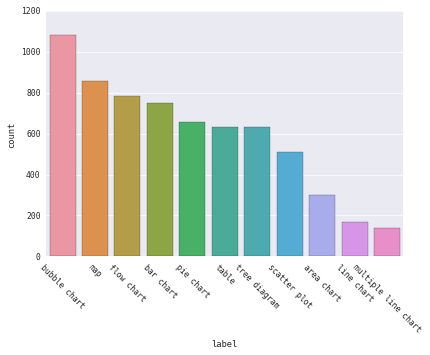

In [147]:
# Top-10 Distribution by ImageID
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='label', data=df_label_top10, order=df_label_top10.label.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
# fig.set_size_inches(11.7, 8.27)
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/categories-distribution-top10.png")

In [148]:
# TODO
# change dimensions & higher quality/resolution

### Raw Users Analysis

In [149]:
df['iduser'].value_counts()[:10]

22    6441
32      39
26      27
33      23
41      17
23      15
24      15
Name: iduser, dtype: int64

In [150]:
stats["nbUniqueUsersRaw"] = len(df['iduser'].value_counts())
print("Number of unique visitors: %s" % stats["nbUniqueUsersRaw"])
print("Double checking of unique visitors: %s" % len(df['iduser'].unique()))

Number of unique visitors: 7
Double checking of unique visitors: 7


### Clean Users Analysis

We discarded the following events

* Users with less than 2 answers
* 

TODO 

* Number of answers / logs per participants (show distribution)
* Longest series of answers
* Participants with most accuracy
* Ones that are similar / agree together
* Ones that are not consensual at all
* Outliers
* Cluster by participants similarities

In [145]:
# Discard users that do not provide enough results
df_users_clean = df.groupby("iduser").filter(lambda x: len(x) > 10)
df_users_clean

,task,task_id,iduser,timestamp,date,event,idtype,label,idimg,imagepath
0,textual,textual_3,22,1501074459,2017-07-26 15:07:39.289,submitted,7,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,textual,textual_7,22,1501075088,2017-07-26 15:18:08.598,submitted,8,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,textual,textual_8,22,1501075105,2017-07-26 15:18:25.580,submitted,9,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,textual,textual_9,22,1501075113,2017-07-26 15:18:33.395,submitted,8,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,textual,textual_10,22,1501075119,2017-07-26 15:18:39.158,submitted,8,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,textual,textual_11,22,1501075131,2017-07-26 15:18:51.656,submitted,9,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,textual,textual_12,22,1501075143,2017-07-26 15:19:03.262,submitted,7,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,textual,textual_13,22,1501075155,2017-07-26 15:19:15.433,submitted,7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,textual,textual_14,22,1501075162,2017-07-26 15:19:22.597,submitted,10,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,textual,textual_15,22,1501075170,2017-07-26 15:19:30.230,submitted,8,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


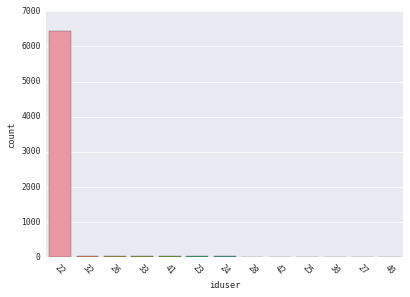

In [144]:
sns.set(context="paper", font="monospace")
sns_plot = sns.countplot(x='iduser', data=df_users_clean, order=df_users_clean.iduser.value_counts().index)
plt.xticks(rotation=-45)
show()
fig = sns_plot.get_figure()
fig.savefig("/Users/rvuillemot/Dropbox/paper-2017-crowdvis/figures/users-distribution-clean.png")

## Image Collection Analysis

TODO

* [X] Load all the images
* [ ] Images by categories (if known) e.g. web, dataset, from extension, etc.
* [ ] 


In [156]:
df_images = pd.read_json('data/images-26-08-2017.json') #  index_col=[0]
df_images_subset = df_images[:10][:10]
df_images_subset

,Type,id,path
0,bubble chart,143,https://s3.eu-central-1.amazonaws.com/namethat...
1,tree diagram,238,https://s3.eu-central-1.amazonaws.com/namethat...
2,candlestick chart,7,https://s3.eu-central-1.amazonaws.com/namethat...
3,tree diagram,81,https://s3.eu-central-1.amazonaws.com/namethat...
4,tree diagram,217,https://s3.eu-central-1.amazonaws.com/namethat...
5,candlestick chart,222,https://s3.eu-central-1.amazonaws.com/namethat...
6,bubble chart,146,https://s3.eu-central-1.amazonaws.com/namethat...
7,bubble chart,48,https://s3.eu-central-1.amazonaws.com/namethat...
8,network diagram,191,https://s3.eu-central-1.amazonaws.com/namethat...
9,tree diagram,78,https://s3.eu-central-1.amazonaws.com/namethat...


In [17]:
stats["nbTotalImages"] = len(df_images)
print("Total number of images in dataset: %s" % stats["nbTotalImages"])

Total number of images in dataset: 4856


### Image links similarities

* Look at the connection between images
* Stronger connection if belong to the same category


In [170]:
df_images_subset["id"][81]

KeyError: 81

SyntaxError: invalid syntax (<ipython-input-165-2fd17edb528d>, line 1)

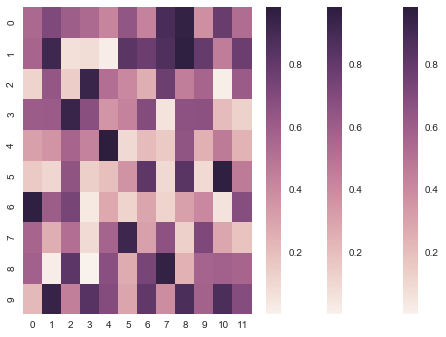

In [154]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)
show()

In [155]:
uniform_data

array([[ 0.5488135 ,  0.71518937,  0.60276338,  0.54488318,  0.4236548 ,
         0.64589411,  0.43758721,  0.891773  ,  0.96366276,  0.38344152,
         0.79172504,  0.52889492],
       [ 0.56804456,  0.92559664,  0.07103606,  0.0871293 ,  0.0202184 ,
         0.83261985,  0.77815675,  0.87001215,  0.97861834,  0.79915856,
         0.46147936,  0.78052918],
       [ 0.11827443,  0.63992102,  0.14335329,  0.94466892,  0.52184832,
         0.41466194,  0.26455561,  0.77423369,  0.45615033,  0.56843395,
         0.0187898 ,  0.6176355 ],
       [ 0.61209572,  0.616934  ,  0.94374808,  0.6818203 ,  0.3595079 ,
         0.43703195,  0.6976312 ,  0.06022547,  0.66676672,  0.67063787,
         0.21038256,  0.1289263 ],
       [ 0.31542835,  0.36371077,  0.57019677,  0.43860151,  0.98837384,
         0.10204481,  0.20887676,  0.16130952,  0.65310833,  0.2532916 ,
         0.46631077,  0.24442559],
       [ 0.15896958,  0.11037514,  0.65632959,  0.13818295,  0.19658236,
         0.36872517,  

# Building a Graph of Similiarities


TODO

* Load images as graph node
  *  Only images that have a category!
* Node size should vary based on some attribute
* Link size also both visually and in terms of strenght
* Make the layout deterministic to render the same each time?
* Add images in nodes circles (SVG background)
* Hover shows the full chart
*

* Create a matrix that will be the foundation for the taxonomy graph
* 

* Graph chart layout -> Plotly?
* Sankey Diagram https://github.com/ricklupton/ipysankeywidget


In [18]:
import json

nodes_list = []
links_list = []
json_data = {"nodes":nodes_list, "links":links_list}

In [19]:
# Fake data
nodes_list.append({"id": "Myriel", "group": 1})
nodes_list.append({"id": "Napoleon", "group": 1})
nodes_list.append({"id": "Mlle.Baptistine", "group": 1})

links_list.append({"source": "Napoleon", "target": "Myriel", "value": 1})

In [20]:
json_dump = json.dumps(json_data, indent=1, sort_keys=True)
print(json_dump)

{
 "links": [
  {
   "source": "Napoleon",
   "target": "Myriel",
   "value": 1
  }
 ],
 "nodes": [
  {
   "group": 1,
   "id": "Myriel"
  },
  {
   "group": 1,
   "id": "Napoleon"
  },
  {
   "group": 1,
   "id": "Mlle.Baptistine"
  }
 ]
}


In [21]:
graph_file = '/Users/rvuillemot/Dev/NameThatChart/graph/data.json'
json_out = open(graph_file, 'w')
json_out.write(json_dump)
json_out.close()

# Empirical Study of Current Taxonomies

* Original spreadsheet https://docs.google.com/spreadsheets/d/1pObBSCB38wGJmrh8lxl1agYS94ZTggemnfOrM-v_YgI/edit?usp=sharing


In [44]:
df_taxonomy = pd.read_csv('https://docs.google.com/spreadsheets/d/' + 
                   '1pObBSCB38wGJmrh8lxl1agYS94ZTggemnfOrM-v_YgI' +
                   '/export?gid=0&format=csv',
                   # Set first column as rownames in data frame
                   index_col=0
                  )
df_taxonomy.head(5)

,URL,origin,nb_vis_types,nb_vis_levels,nb_levels,nb_templates
Dataviz for all,https://www.datavizforall.org/chart/,tutorial,NaN,NaN,NaN,NaN
Protovis,http://mbostock.github.io/protovis/ex/,toolkit,NaN,NaN,NaN,NaN
A periodic table,http://www.visual-literacy.org/periodic_table/...,tutorial,NaN,NaN,NaN,NaN
Highcharts,https://www.highcharts.com/demo,toolkit,NaN,NaN,NaN,NaN
Vega,https://vega.github.io/vega/examples/,toolkit,NaN,NaN,NaN,NaN


In [45]:
stats["nbTaxonomies"] = df_taxonomy['origin'].count()
stats["nbTaxonomies"]

29

In [46]:
stats["nbTaxonomiesTutorial"] = len(df_taxonomy[df_taxonomy.origin == 'tutorial'])
stats["nbTaxonomiesTutorial"]

7

In [47]:
stats["nbTaxonomiesSoftware"] = len(df_taxonomy[df_taxonomy.origin == 'software'])
stats["nbTaxonomiesSoftware"]

8

In [48]:
df_taxonomy['origin'].count()

29

## Stats writing

e.g.:

```
\def \totalTaxonomies {$12$~}
\def \totalCategories {$5$~}
```

In [35]:
# stats = {}

In [36]:
stats_file = "/Users/rvuillemot/Dropbox/paper-2017-crowdvis/stats.inc"
stats_content = "" #"\def \\totalTaxonomies {15~}\n"

In [37]:
for s in stats:
    print(s, stats[s])
    stats_content += "\def \\%s {%s}\n" % (s, stats[s])

totalFoundTaxonomies 23
nbTotalLogsEntries 6640
nbUniqueUsers 20
nbTaxonomies 23
totalFoundTaxonomiesTutorial 6
nbTaxonomiesTutorial 6
totalFoundTaxonomiesSoftware 3
nbTaxonomiesSoftware 3
nbTotalImages 4856


In [38]:
text_file = open(stats_file, "w")
text_file.write(stats_content)
text_file.close()